# Problem 1: Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

**Data Dictionary:**\
Variable Name	Description\
Carat	 Carat weight of the cubic zirconia.

Cut	 Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

Color 	 Colour of the cubic zirconia.With D being the best and J the worst.

Clarity	 cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

Depth	 The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

Table	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price	 the Price of the cubic zirconia.\
X	 Length of the cubic zirconia in mm.\
Y	 Width of the cubic zirconia in mm.\
Z	 Height of the cubic zirconia in mm.

**Dataset for Problem 1: cubic_zirconia.csv**


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import matplotlib.style
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [1513]:
df=pd.read_csv('cubic_zirconia.csv')

In [1217]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


**Dropping column 'Unnamed: 0'. It appears as a serial number in dataset, doesn't have any value in our analysis.** 

In [1218]:
df1=df.drop('Unnamed: 0', axis=1)

#### Information about the dataset (df1).

**10 columns, 26967 rows.\
Column 'depth' seems to have few missing values, need more investigation here.\
Columns: 'cut', 'color' & 'clarity' are 'object' (non-numerical) data types. While using predictive modeling, we'll require to change them into numerical datatype.**

In [1219]:
df1.shape

(26967, 10)

In [1220]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


## Checking: Duplicate entries in Dataset

In [1221]:
df1.duplicated().sum()

34

#### Below list is of Duplicate entries. For reference:

In [1222]:
df1[df1.duplicated()]

,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


#### Duplicate entries removed. Number of rows after removing duplication:

In [1223]:
df2=df1.drop_duplicates()
df2.shape

(26933, 10)

Updated dataset (df2) has 26933 rows and 10 columns. 

## Missing Values:

In [1224]:
df2.isnull().sum().to_frame().T

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0,0,0,697,0,0,0,0,0


Dataset has total 697 missing entries, all in 'depth' column. We'll do missing value treatment later but at this stage we are just observing them.\
All other columns dont have any missing value.

## Five Number Summery & beyond for dataset.

In [1225]:
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26933,NaN,NaN,NaN,0.79801,0.477237,0.2,0.4,0.7,1.05,4.5
cut,26933,5,Ideal,10805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26933,7,G,5653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26933,8,SI1,6565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26236,NaN,NaN,NaN,61.7453,1.41224,50.8,61,61.8,62.5,73.6
table,26933,NaN,NaN,NaN,57.4559,2.23216,49,56,57,59,79
x,26933,NaN,NaN,NaN,5.72935,1.12737,0,4.71,5.69,6.55,10.23
y,26933,NaN,NaN,NaN,5.7331,1.16504,0,4.71,5.7,6.54,58.9
z,26933,NaN,NaN,NaN,3.53777,0.719964,0,2.9,3.52,4.04,31.8
price,26933,NaN,NaN,NaN,3937.53,4022.55,326,945,2375,5356,18818


Except 'depth' column, counts are equal for all other columns, means missing value in dataset is limited only to 'depth' column.

'Unique' is basically classes in categorical variables. 'cut', 'color' and 'clarity' columns have unique number as 5, 7 and 8 respectively. We'll check name of these unique items (or classes) and distribution of data across these items in subsiquent steps.

'Top' and 'Frequency' is also for non-numerical variables.It basically indicates name and count of class having highest frequency. Observations from the above table: \
* there are 10,805 zirconia stones has ideal cut.\
* there are 5,653 zirconia stones with G color, and \
* there are 6,565 zirconia stones with Sl1 level of clarity.
These are just the highest values in each non-numerical column.

Data Skewness
‘Mean’ values are very close to the ‘Median’ (50%) across columns indicating data is normally distributed except for 'price' column. Higher 'Mean' value than the 'Median' in 'price' column is pointing out towards right skewenss in price data which is our target/ response variable.

Standard Deviation (std)
Low ‘std’ values across features indicate that datapoints are concentrated around their respective 'Means', which reveals that data is within a narrow range. 'price' column is an exception here, as its 'std' is high, meaning it's data is spread in a large area.

Five number summary:
Minimum, 
Q1 (1st quartile/ 25%), 
Median (50%), 
Q3 (3rd quartile/ 75%) and 
Maximum values of all the features published in the above matrix. 

This helps in getting an initial idea about dispersion of data through Min-Max and Inter-Quartile Range (IQR = Q3 – Q1) of each column.
Since Standard Deviation in almost all columns is a tiny number, therefore most of the data is concentrated around it's mean value and the same is reflected in Range of the data. for example: IQR of 'depth' column = (Q3 - Q1) = (62.5 - 61.0) = 1.5 which is an extremely small value comparing the numbers depth column has.
Inter-Quartile Range of 'price' feature is large, (5356 - 945 = 4411), unlike other features data on price column is widely dispersed.

Outliers
Maximum values in few columns like: 'y' 'z' & 'price' is signaling that there may be few large size outliers which may impact on my predictions.

Minimum Value
Minimum value of columns representing dimension ('x' 'y' & 'z' are 'Zero') which is not possible. This needs more investigation and correction of the same. 

The initial observation guides us that there is no major anamoly in dataset, by & large the data is normal however before we make use of this dataset in our prediction model, we need to do following checks & treatment:-

A: Missing value treatment in 'depth' column.
B: Convert categorical columns into continous.
C: Check outliers and give them a treat, if required.
D: Length, Width & Height columns (x, y & z) have min value as '0' which needs correction. 

#### Distribution of data in Non-Numerical datatype columns, like: cut, color & clarity.

C:\Users\gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cut', ylabel='count'>

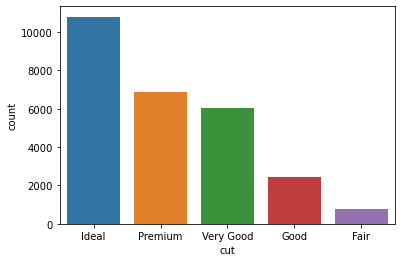

In [1274]:
sns.countplot(df2.cut)

In [1226]:
df2.cut.value_counts().to_frame().T

,Ideal,Premium,Very Good,Good,Fair
cut,10805,6886,6027,2435,780


From total 26,933 zirconia pieces, the best quality cut zirconia is 40% (10,805 counts).

However, about 90% of zirconia has very good or better quality cut.

On quality of 'cut of the stone': Collection is excellent. 

C:\Users\gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='color', ylabel='count'>

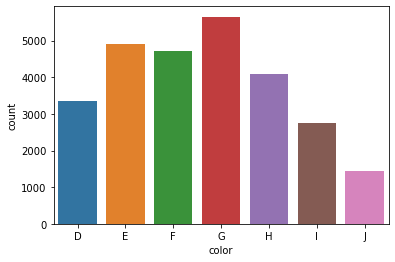

In [1597]:
sns.countplot(df2.color, order=['D', 'E','F','G','H','I','J'], )

In [1608]:
df2.color.value_counts(sort=False, ascending=True).to_frame().T


,G,I,J,F,H,E,D
color,5653,2765,1440,4723,4095,4916,3341


In [1227]:
# df2.color.value_counts().to_frame().T

,G,E,F,H,D,I,J
color,5653,4916,4723,4095,3341,2765,1440


On color of the stone, 'D' is the best; in the same alphatical order, 'J' is the worst.

The best color zirconia is only 12% (3341) of collection.\
While the best three colors (D, E & F) make almost half of stone collection.

On the basis of 'color of stone': Collection seems good. 

C:\Users\gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='clarity', ylabel='count'>

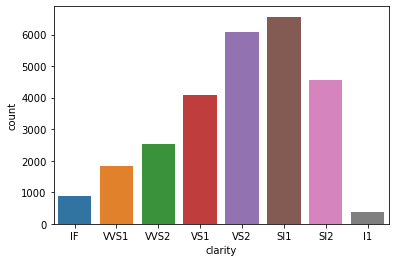

In [1599]:
sns.countplot(df2.clarity, order=['IF','VVS1', 'VVS2','VS1','VS2','SI1','SI2','I1'])

In [1611]:
df2.clarity.value_counts(sort=False, ascending=True).to_frame().T

,VVS1,I1,VS2,SI1,SI2,VVS2,IF,VS1
clarity,1839,364,6093,6565,4564,2530,891,4087


Clarity Scale, Best to Worst: FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3.

Best quality FL and worst qualities I2, I3 are not present in this dataset.\
2nd from best quality, IF, is only 3% (891) of entire zirconia collection. \
If we include top order clarity in stone (IF, VVS1 & VVS2), it makes only 20% of overall collection of 26,933 stones.

On 'clarity of stones': Collection seems average in quality.

## Univeriate Analysis: 
#### Checking distribution of data in numerical columns through Distribution and Boxplot.

C:\Users\gupta\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\gupta\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\gupta\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and w

<AxesSubplot:xlabel='x'>

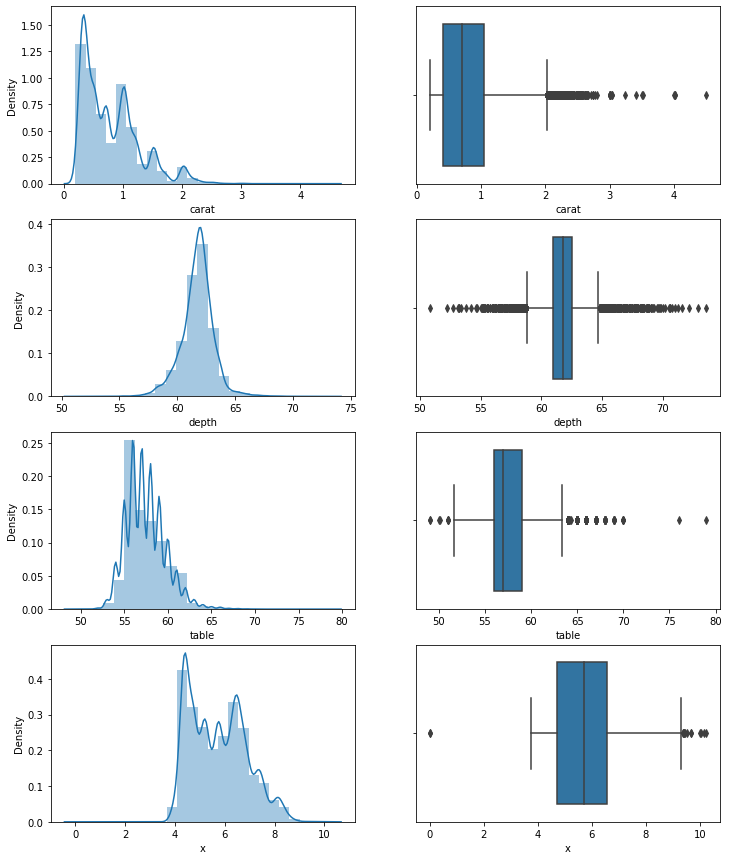

In [888]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12,15)

sns.distplot(df2['carat'], ax=axes[0][0], bins=25) 
sns.boxplot(df2['carat'], orient='v', ax=axes[0][1]) 

sns.distplot(df2['depth'], ax=axes[1][0], bins=25)
sns.boxplot(df2['depth'], orient='v', ax=axes[1][1])

sns.distplot(df2['table'], ax=axes[2][0], bins=25)
sns.boxplot(df2['table'], orient='v', ax=axes[2][1])

sns.distplot(df2['x'], ax=axes[3][0], bins=25)
sns.boxplot(df2['x'], orient='v', ax=axes[3][1])

Distribution Plot-
Evident in the pictorial graph that 'carat', 'depth', 'table' and 'x' has data which is normally distributed. 
Except 'depth' all other variables have multimodal distribution which is otherwise difficult to estimate from data table.

Box Plot-
Boxplot which helps in determining outliers (unusual values) in a variable, is indicating that 'carat' has presence of outliers on its upper whisker which is dragging the curve a bit to it's right.

'depth' has heavy presence of outliers on both sides of boxplot.
'table' has outliers on both the sides but very few and the same is the case with variable 'x'.

C:\Users\gupta\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\gupta\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\gupta\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and w

<AxesSubplot:xlabel='price'>

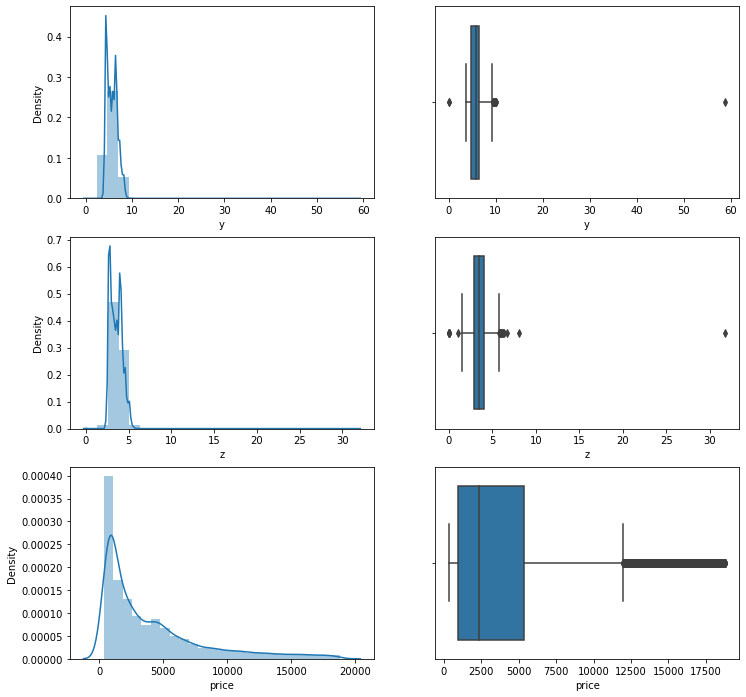

In [889]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12,12)

sns.distplot(df2['y'], ax=axes[0][0], bins=25) 
sns.boxplot(df2['y'], orient='v', ax=axes[0][1]) 

sns.distplot(df2['z'], ax=axes[1][0], bins=25)
sns.boxplot(df2['z'], orient='v', ax=axes[1][1])

sns.distplot(df2['price'], ax=axes[2][0], bins=25)
sns.boxplot(df2['price'], orient='v', ax=axes[2][1])

Distribution Graph-
Variable 'price' is right skewed, as anticipated during 5 number summery; and the reason is, very strong presence of outliers on upper whisker.

Variable 'x' and 'y' has similler graphs, data normally distributed, hardly any presence of outliers however it seems there is one exponential outlier in both the variables. It may require treatment.

## Multivariate Analysis:
#### Analysis of relationship between variables, using HeatMap, Pair Plot & Scatter Plot.

<AxesSubplot:>

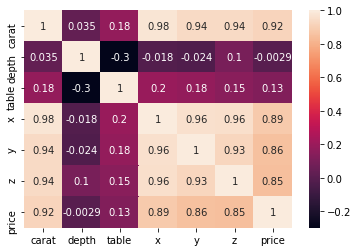

In [890]:
correlation=df2.corr()
sns.heatmap(correlation, xticklabels=correlation.columns,
           yticklabels=correlation.columns,
           annot=True)

The graph is representing relationship between two variables at any given time.

All 7 numerical variables are presented on X and Y both the axises. \
Relationsip strength is indicated through numbers written in colored squares. In this graph, numbers vary from 0.2 to 1.0. All relationships are positive.
Light color indicates stronger relationships. Please ignore diagonal numbers (1's) as it represents relationship of a variable with itself.

The strongest relationship in this dataset is between 'carat' and 'x' (length of zirconia), 0.98.
This indicates, length of the stone determines its carat weight. Infact the reverse of this relationship is also true.

'carat' has strong relationship with price variable and dimension of stone (length, width & height/ x, y & z).

'depth' and 'table' features seems insignificant here.

'price' is another variable which has strong & positive relationships with most of the variables in dataset, like: carat and length, width & height of stone (x, y & z).

From this co-relationship map it is evidently clear that 'price', 'carat' and 'dimension (x/y/z)' are highly correlated variables. It means, bigger the size of stone, higher its carat weight will be which makes the stone more expensive.\
We can arrange the order of these parameters differently as well, for example: if we are ready to pay higher price, we can buy bigger & heavier zirconia.

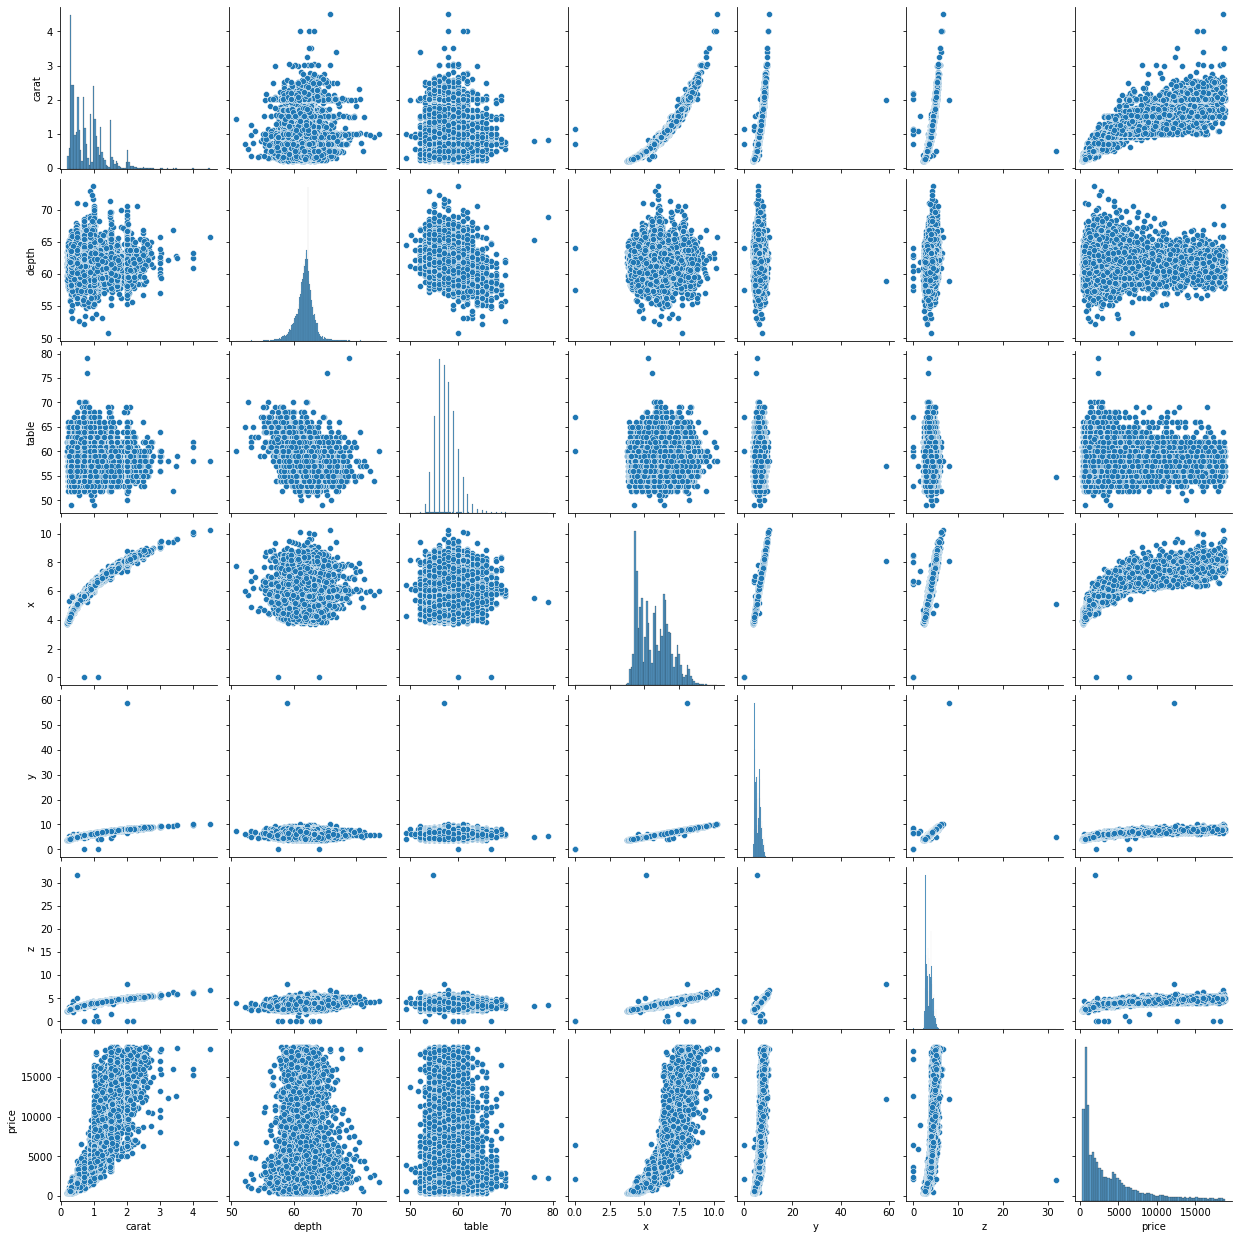

In [891]:
sns.pairplot(df2)

'price' and 'carat' data is highly correlated, a small change in carat data makes exponential change in price value. This relationship is positive.

'price' has strong relationship with x, y & z (length, width & height) means size of stone. Bigger the size, higher the price.

'carat' also has strong relationship with x, y, & z variables (length, width & height) which indicates that bigger the size of stone, higher is it's carat weight.

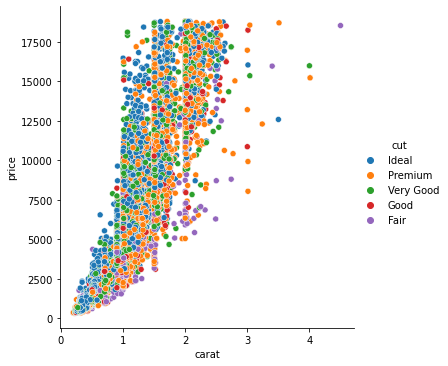

In [892]:
sns.relplot(x='carat', y='price', hue='cut', data=df2)

From HeatMap & PairPlot graph we inferred that price and carat weight has positive & strong correlation. Keeping this in mind, now we are trying to understand if other features like: cut, color & clarity has any influence on this relationship.

The above graph studies impact of quality of 'cut' on carat & price combination.

The first glimps of graph gives an impression that the price of 'ideal cut' (blue dots) stones is in higher range than the price of stones with other types of cut in same carat weight. 
Not only that, with the increasing carat weight, the price of 'ideal cut' zirconia is increasing exponentially.

If we draw an imaginery straight line capturing most of the blue dots and compare it with other such straight lines for 'premuim' cut, 'very good' cut, etc.; we can see that the line connecting blue dots will have the steepest incline, meaning the sharpest change in the price.

Conclusion: Quality of 'cut' has direct influence on the 'price' of zirconia and it also affects positively the rate of increase in price with an increase in its carat weight.

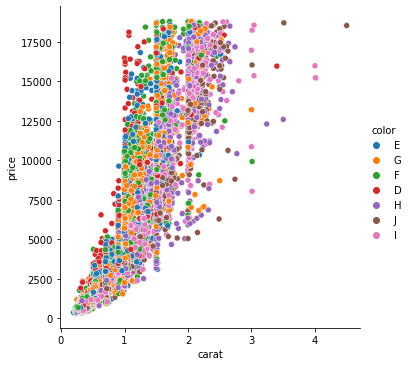

In [893]:
sns.relplot(x='carat', y='price', hue='color', data=df2)

The influence of 'color' of stone is very obvious on Y-axis (price). 
With slight change in 'carat' weight, price is increasing exponentially for color D which is the  best color in zirconia. If we follow red dots (D color), we can draw a vertical straight line almost parallel to Y-axis. This is an indication of an incredible price rise. 

The order of 'quality of color' is: D is the best while J the worst. 

It is easy to read through the graph, color E & F are in upper price range than stones with color I & J. Infact with change in carat weight, change in the price for E & F is more than I & J color stones. 

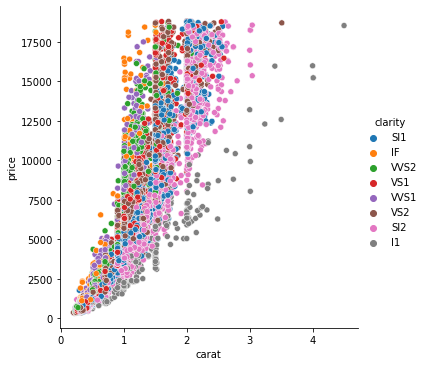

In [894]:
sns.relplot(x='carat', y='price', hue='clarity', data=df2)

Graph shows 8 different 'clarity' standards in zirconia stones. An decreasing order is:\
IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1.    

Orange dots on graph are placed high on Y-axis (price), meaning 'IF standard of clarity' makes a zirconia stone expensive. With increase in carat weight of stone, the price of stone with IF clarity increases rapidly. 

More or less the same trend continues across this relationship graph. The better stone clarity attracts better price. Also, higher clarity standard products are noticed with higher jump in the price for adding weightage in the carat.

'I1' is lowest in stone clarity therefore it price is the lowest in the same carat weight. And the increment in the price with respect to increased weight of stone is also the least, comparing stones having better clarity standerds.  

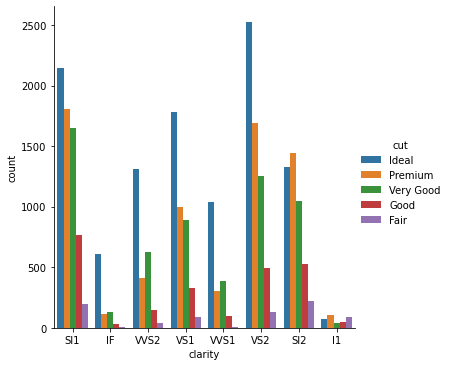

In [897]:
sns.catplot(x='clarity', y=None, hue='cut', data=df2, kind='count')

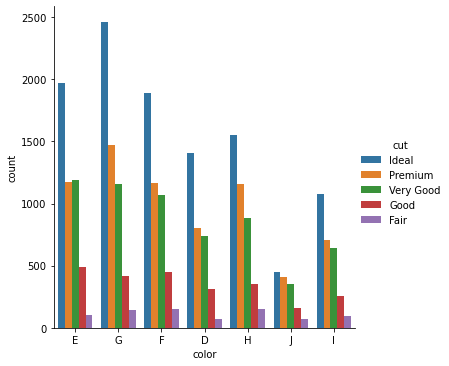

In [898]:
sns.catplot(x='color', y=None, hue='cut', data=df2, kind='count')

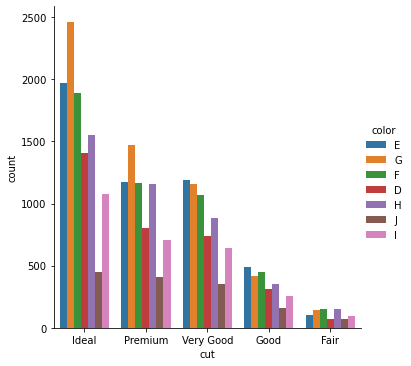

In [895]:
sns.catplot(x='cut', y=None, hue='color', data=df2, kind='count')

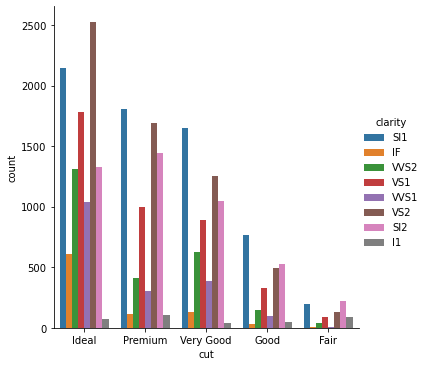

In [896]:
sns.catplot(x='cut', y=None, hue='clarity', data=df2, kind='count')

# Null Value Imputation (if present),
# Check values which are = 0 (are they meaningful here),
# Decide about Scaling in this dataset.

In [1229]:
df2.isnull().sum().to_frame().T

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0,0,0,697,0,0,0,0,0


Just for a quick reference publishing missing value data from present dataset.\
There are 697 missing values in 'depth' column.

Since value is missing only in one column whereas all other columns have full data; therefore, it would be better to impute missing data than dropping it. \

We would like to replace missing data with Median of depth column.

In [1230]:
df3 = df2.fillna(df2.median())
df3.isnull().sum().to_frame().T

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0,0,0,0,0,0,0,0,0


Zeros in above table confirms that there is no missing value in the latest dataset (df3).

#### Reprinting describe function to check if there are '0s' or any 'negative value' in dataset. Taking only numerical columns this time.

In [1231]:
df3.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26933,NaN,NaN,NaN,0.79801,0.477237,0.2,0.4,0.7,1.05,4.5
cut,26933,5,Ideal,10805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26933,7,G,5653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26933,8,SI1,6565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26933,NaN,NaN,NaN,61.7467,1.39388,50.8,61.1,61.8,62.5,73.6
table,26933,NaN,NaN,NaN,57.4559,2.23216,49,56,57,59,79
x,26933,NaN,NaN,NaN,5.72935,1.12737,0,4.71,5.69,6.55,10.23
y,26933,NaN,NaN,NaN,5.7331,1.16504,0,4.71,5.7,6.54,58.9
z,26933,NaN,NaN,NaN,3.53777,0.719964,0,2.9,3.52,4.04,31.8
price,26933,NaN,NaN,NaN,3937.53,4022.55,326,945,2375,5356,18818


Column x, y & z has 0 values which doesnt seem reasonable here as they represent length, width and height dimensions which can not be 0 in measurement.\
Therefore, our endeavour is to find out how many 0 values are present in each of these three columns and take a decision wither to impute it or delect the row. 

In [1232]:
pd.value_counts(df3['x']==0, ascending=True).to_frame()

,x
True,2
False,26931


Column 'x' has two 0 values. Since 'x' represents 'length' of zirconia, a length dimension can not be 0, therefore it seems a data anamoly which needs correction. 

In [1243]:
df3['x']=df3['x'].replace(0, 'NaN').astype('float')
pd.value_counts(df3['x']==0, ascending=True).to_frame()

,x
False,26933


Column 'x' is given a treatment, 0 value is replaced with 'missing value' which will be removed from the dataset.

In [1234]:
pd.value_counts(df3['y']==0, ascending=True).to_frame()

,y
True,2
False,26931


Column 'y' also has two 0 values. 'y' represents 'width' of zirconia which can not be 0, therefore going to treat this data anamoly.

In [1244]:
df3['y']=df3['y'].replace(0, 'NaN').astype('float')
pd.value_counts(df3['y']==0, ascending=True).to_frame()

,y
False,26933


Post giving treatment, 0 value is replaced with 'missing value' which will be removed from the dataset in next step.

In [1236]:
pd.value_counts(df3['z']==0, ascending=True).to_frame()

,z
True,8
False,26925


Column 'z' which represents height of the stone can not be of 0 value. Total 8 such currept values are present in 'z' column.

In [1245]:
df3['z']=df3['z'].replace(0, 'NaN').astype('float')
pd.value_counts(df3['z']==0, ascending=True).to_frame()

,z
False,26933


All 8 such incorrectly recorded 0 values are converted into 'missing values' in dataset 'z'. Next step is to remove these data inacquaricies from the dataset.

In [1246]:
df3.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26933,NaN,NaN,NaN,0.79801,0.477237,0.2,0.4,0.7,1.05,4.5
cut,26933,5,Ideal,10805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26933,7,G,5653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26933,8,SI1,6565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26933,NaN,NaN,NaN,61.7467,1.39388,50.8,61.1,61.8,62.5,73.6
table,26933,NaN,NaN,NaN,57.4559,2.23216,49,56,57,59,79
x,26931,NaN,NaN,NaN,5.72977,1.12633,3.73,4.71,5.69,6.55,10.23
y,26931,NaN,NaN,NaN,5.73353,1.16403,3.71,4.715,5.7,6.54,58.9
z,26925,NaN,NaN,NaN,3.53882,0.717483,1.07,2.9,3.52,4.04,31.8
price,26933,NaN,NaN,NaN,3937.53,4022.55,326,945,2375,5356,18818


In [1247]:
df3.isnull().sum().to_frame()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          2
y          2
z          8
price      0
dtype: int64

In [1614]:
df3.isnull().sum().to_frame().T

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0,0,0,0,0,2,2,8,0


This is a list of missing values across columns in dataset. Column 'x', 'y' & 'z' has 2, 2 & 8 missing values. Since the number of missing values is too small, we will remove it from the dataset in order to keep it clean.

In [1329]:
df4 = df3.dropna()
df4

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


Above is a glimps of a more refind dataset, 1st & last 5 rows are printed. This new dataset is 'df4' emerged after dropping 0s from x, y & z columns. 

In [1617]:
df4.shape

(26925, 10)

In [1330]:
df4.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26925,NaN,NaN,NaN,0.797821,0.477085,0.2,0.4,0.7,1.05,4.5
cut,26925,5,Ideal,10805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26925,7,G,5650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26925,8,SI1,6564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26925,NaN,NaN,NaN,61.747,1.39346,50.8,61.1,61.8,62.5,73.6
table,26925,NaN,NaN,NaN,57.4553,2.23133,49,56,57,59,79
x,26925,NaN,NaN,NaN,5.72938,1.12608,3.73,4.71,5.69,6.55,10.23
y,26925,NaN,NaN,NaN,5.73315,1.16382,3.71,4.71,5.7,6.54,58.9
z,26925,NaN,NaN,NaN,3.53882,0.717483,1.07,2.9,3.52,4.04,31.8
price,26925,NaN,NaN,NaN,3936.25,4020.98,326,945,2373,5353,18818


dataset 'df4' has 26,925 rows, equal for all columns, indicating that now no missing values are in dataset. If we check minimum values of x, y & z columns, it is non zeros, now it is 3.73, 3.71 & 1.07 respectively.

# Outliers
#### Outliers are adjusted in this case, not removing them from our dataset. The presence of outliers in each feature we can refer from boxplots printed earlier (in Univeriate Analysis).

In [1331]:
def adjust_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

la,ua=adjust_outlier(df4['carat'])
df4['carat']=np.where(df4['carat']>ua,ua,df4['carat'])
df4['carat']=np.where(df4['carat']<la,la,df4['carat'])

lc,uc=adjust_outlier(df4['depth'])
df4['depth']=np.where(df4['depth']>uc,uc,df4['depth'])
df4['depth']=np.where(df4['depth']<lc,lc,df4['depth'])

ld,ud=adjust_outlier(df4['table'])
df4['table']=np.where(df4['table']>ud,ud,df4['table'])
df4['table']=np.where(df4['table']<ld,ld,df4['table'])

ls,us=adjust_outlier(df4['x'])
df4['x']=np.where(df4['x']>us,us,df4['x'])
df4['x']=np.where(df4['x']<ls,ls,df4['x'])

ls,us=adjust_outlier(df4['y'])
df4['y']=np.where(df4['y']>us,us,df4['y'])
df4['y']=np.where(df4['y']<ls,ls,df4['y'])

ls,us=adjust_outlier(df4['z'])
df4['z']=np.where(df4['z']>us,us,df4['z'])
df4['z']=np.where(df4['z']<ls,ls,df4['z'])

ls,us=adjust_outlier(df4['price'])
df4['price']=np.where(df4['price']>us,us,df4['price'])
df4['price']=np.where(df4['price']<ls,ls,df4['price'])

C:\Users\gupta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gupta\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\gupta\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

<AxesSubplot:>

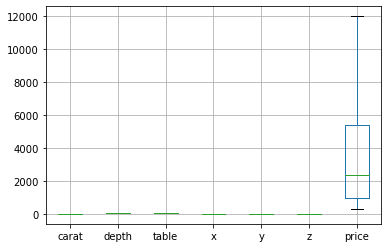

In [1332]:
df4.boxplot(column=['carat', 'depth', 'table', 'x', 'y', 'z', 'price'])

No datapoints are printed on this graph. Although, most of the boxes are just a line because they are very small in value in comparision to price values but still there are no dots present in the graph which indicates that outlier treatment was successful. There is no presence of outlier datapoints in this dataset.

We have decided not to scale this dataset as this dataset has multicollinearity. 

Use of Standard Scaler to interpret multiple-linear regression model is justified where independent variables are perfectly uncorrelated.

	Please refer ‘heat map’ graph in heading 1.1.8.
Independent variables in the dataset has strong correlation with each other.

	We can check multicollinearity through Variance Inflation Factor also.

In [ ]:
df4.shape

df4.isnull().sum().to_frame().T

df4.cut.to_frame().T

In [ ]:
df4.color.to_frame().T

df4.clarity.to_frame().T

from sklearn.preprocessing import OrdinalEncoder

color_list = ['J','I','H','G','F','E','D']
OE_col = OrdinalEncoder(categories=[color_list])
pd.DataFrame(OE_col.fit_transform(df4[['color']])).T

clarity_list = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1', 'IF']
OE_clarity = OrdinalEncoder(categories=[clarity_list])
pd.DataFrame(OE_clarity.fit_transform(df4[['clarity']])).T

cut_list = ['Fair','Good','Very Good','Premium','Ideal']
OE_cut = OrdinalEncoder(categories=[cut_list])
pd.DataFrame(OE_cut.fit_transform(df4[['cut']])).T

df4.color = pd.DataFrame(OE_col.fit_transform(df4[['color']]))
df4.clarity = pd.DataFrame(OE_clarity.fit_transform(df4[['clarity']]))
df4.cut = pd.DataFrame(OE_cut.fit_transform(df4[['cut']]))

df4.head(10)

In [ ]:
df4.isnull().sum().to_frame().T

df5 = df4.dropna()
df5.shape

# convert 'object' datatype features into integer/ float (continous) data. 

for column in df5[['color','clarity','cut']]:
    if df5[column].dtype == 'object':
        df5[column] = pd.Categorical(df5[column]).codes 

df5.describe().T

26883*(25/100)

df5.corr().round(2)

# Model Building
# VIF Score (Variance Inflation Factor)

In [ ]:
# Altered dataset. UnScaled.

# X = df5.drop(['price', 'x', 'z', 'y', 'table', 'depth'], axis=1)
# y = df5[['price']]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

X_train.shape

X_test.shape

# All columns, UnScaled dataset.

X = df5.drop(['price'], axis=1)
y = df5[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

X_train.shape

X_test.shape

# applying Standard Scaler (Optional).

# sc=StandardScaler()
# X_train_scaled=sc.fit_transform(X_train)
# X_test_scaled=sc.transform(X_test)

X_train_scaled

X_test_scaled

# Linear Regression model on UnScaled data.

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Linear Regression model on Scaled data.

# regression_model = LinearRegression()
# regression_model.fit(X_train_scaled, y_train)

# For each X, calculate VIF and save in dataframe

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(2).T

# # For each X, calculate VIF and save in dataframe

# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif["features"] = X.columns

# vif.round(2).T

# Coefficients

In [ ]:
# when no column is removed. Unscaled data.

# for idx, col_name in enumerate(X_train):
#     print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx].round(2)))

# column removed: 'x', 'z', 'y', 'table', 'depth'. with Scaled data.

for idx, col_name in enumerate(X_train_scaled):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx].round(2)))

# # column removed: 'x', 'z', 'y', 'table', 'depth'. Unscaled data.

# for idx, col_name in enumerate(X_train):
#     print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx].round(2)))

# # scaled data, 'x' column removed.

# for idx, col_name in enumerate(X_train_scaled):
#     print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx].round(2)))

# scaled data is used. no column removed.

# for idx, col_name in enumerate(X_train_scaled):
#     print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx].round(2)))

# when z' is removed.

# for idx, col_name in enumerate(X_train):
#     print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx].round(2)))

# when 'y' is removed.

# for idx, col_name in enumerate(X_train):
#     print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx].round(2))) #removed x var in data.

# when 'x' is removed.

# for idx, col_name in enumerate(X_train):
#     print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx].round(2))) #removed x var in data.

# # 'color' column removed.

# for idx, col_name in enumerate(X_train):
#     print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx].round(2))) #removed x var in data.

# Intercept for Model

In [ ]:
# scaled data. no column removed.

intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

# when no cloumn is removed.

# intercept = regression_model.intercept_[0]
# print("The intercept for our model is {}".format(intercept))

# when z' is removed.

# intercept = regression_model.intercept_[0]
# print("The intercept for our model is {}".format(intercept))

# when 'y' is removed.
# intercept = regression_model.intercept_[0]
# print("The intercept for our model is {}".format(intercept))

# # when 'x' is removed.
# intercept = regression_model.intercept_[0]
# print("The intercept for our model is {}".format(intercept))

# R2 Training data

In [ ]:
# column removed: 'x', 'z', 'y', 'table', 'depth'. with Scaled data.

# # R square on training data
regression_model.score(X_train_scaled, y_train).round(4)

# # column removed: 'x', 'z', 'y', 'table', 'depth'. Unscaled data.

# # # R square on training data
# regression_model.score(X_train, y_train).round(4)

# scaled data, 'x' column is removed.

# # R square on training data
# regression_model.score(X_train_scaled, y_train).round(4)

# # scaled data is used. no column removed.

# # R square on training data
# regression_model.score(X_train_scaled, y_train).round(4)

# when no cloumn is removed. original data.

# # R square on training data
# regression_model.score(X_train, y_train).round(4)

# when z' is removed.

# # R square on training data
# regression_model.score(X_train, y_train).round(4)

# when 'y' is removed.

# # R square on training data
# regression_model.score(X_train, y_train).round(4)

# # when 'x' is removed.

# # R square on training data
# regression_model.score(X_train, y_train).round(4)

# # when 'color' column is removed.

# R square on training data
regression_model.score(X_train, y_train).round(4)

# R2 Testing data

In [ ]:

1
# column removed: 'x', 'z', 'y', 'table', 'depth'. with Scaled data.
2
​
3
# # R square on testing data
4
regression_model.score(X_test_scaled, y_test).round(4)
0.8758
1
# column removed: 'x', 'z', 'y', 'table', 'depth'. Unscaled data.
2
​
3
# # R square on testing data
4
# regression_model.score(X_test, y_test).round(4)
0.8758
1
# Scaled Data. 'x' column removed.
2
​
3
# # R square on testing data
4
# regression_model.score(X_test_scaled, y_test).round(4)
0.8811
1
# Scaled Data. No column removed.
2
​
3
# R square on testing data
4
# regression_model.score(X_test_scaled, y_test).round(4)
0.8815
1
# when no cloumn is removed.
2
​
3
# # R square on testing data
4
# regression_model.score(X_test, y_test).round(4)
0.8815
1
# when 'z' is removed.
2
​
3
# # R square on testing data
4
# regression_model.score(X_test, y_test).round(4)
0.881
1
# when 'y' is removed.
2
​
3
# # R square on testing data
4
# regression_model.score(X_test, y_test).round(4)
0.8804
1
# # when 'x' is removed.
2
​
3
# # R square on testing data
4
# regression_model.score(X_test, y_test).round(4)
0.8811


# RMSE Training data

In [ ]:
# column removed: 'x', 'z', 'y', 'table', 'depth'. with Scaled data.

#RMSE on Training data
predicted_train = regression_model.fit(X_train_scaled, y_train).predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train)).round(2)

# # column removed: 'x', 'z', 'y', 'table', 'depth'. Unscaled data.

# #RMSE on Training data
# predicted_train = regression_model.fit(X_train, y_train).predict(X_train)
# np.sqrt(metrics.mean_squared_error(y_train,predicted_train)).round(2)

# # Scaled Data. 'x' column removed.

# #RMSE on Training data
# predicted_train = regression_model.fit(X_train_scaled, y_train).predict(X_train_scaled)
# np.sqrt(metrics.mean_squared_error(y_train,predicted_train)).round(2)

# # Scaled Data. No column removed.

# #RMSE on Training data
# predicted_train = regression_model.fit(X_train_scaled, y_train).predict(X_train_scaled)
# np.sqrt(metrics.mean_squared_error(y_train,predicted_train)).round(2)

# when no cloumn is removed.

# #RMSE on Training data
# predicted_train = regression_model.fit(X_train, y_train).predict(X_train)
# np.sqrt(metrics.mean_squared_error(y_train,predicted_train)).round(2)

# when 'z' is removed.

# #RMSE on Training data
# predicted_train = regression_model.fit(X_train, y_train).predict(X_train)
# np.sqrt(metrics.mean_squared_error(y_train,predicted_train)).round(2)

# when 'y' is removed.

# #RMSE on Training data
# predicted_train = regression_model.fit(X_train, y_train).predict(X_train)
# np.sqrt(metrics.mean_squared_error(y_train,predicted_train)).round(2)

# # when 'x' is removed.

# #RMSE on Training data
# predicted_train = regression_model.fit(X_train, y_train).predict(X_train)
# np.sqrt(metrics.mean_squared_error(y_train,predicted_train)).round(2)

# # when 'color' column is removed.

# # #RMSE on Training data
# predicted_train = regression_model.fit(X_train, y_train).predict(X_train)
# np.sqrt(metrics.mean_squared_error(y_train,predicted_train)).round(2)

# RMSE Testing data

In [ ]:
# column removed: 'x', 'z', 'y', 'table', 'depth'. with Scaled data.

#RMSE on Training data
predicted_test = regression_model.fit(X_test_scaled, y_test).predict(X_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test)).round(2)

# column removed: 'x', 'z', 'y', 'table', 'depth'. Unscaled data.

# #RMSE on Testing data
# predicted_test = regression_model.fit(X_train, y_train).predict(X_test)
# np.sqrt(metrics.mean_squared_error(y_test,predicted_test)).round(2)

# Scaled Data. 'x' column removed.

# #RMSE on Testing data
# predicted_test = regression_model.fit(X_train_scaled, y_train).predict(X_test_scaled)
# np.sqrt(metrics.mean_squared_error(y_test,predicted_test)).round(2)

# # Scaled Data. No column removed.

# #RMSE on Testing data
# predicted_test = regression_model.fit(X_train_scaled, y_train).predict(X_test_scaled)
# np.sqrt(metrics.mean_squared_error(y_test,predicted_test)).round(2)

# when no cloumn is removed.

# #RMSE on Testing data
# predicted_test = regression_model.fit(X_train, y_train).predict(X_test)
# np.sqrt(metrics.mean_squared_error(y_test,predicted_test)).round(2)

# when 'z' is removed.

# #RMSE on Testing data
# predicted_test = regression_model.fit(X_train, y_train).predict(X_test)
# np.sqrt(metrics.mean_squared_error(y_test,predicted_test)).round(2)

# when 'y' is removed.

# #RMSE on Testing data
# predicted_test = regression_model.fit(X_train, y_train).predict(X_test)
# np.sqrt(metrics.mean_squared_error(y_test,predicted_test)).round(2)

# # when 'x' is removed.

# #RMSE on Testing data
# predicted_test = regression_model.fit(X_train, y_train).predict(X_test)
# np.sqrt(metrics.mean_squared_error(y_test,predicted_test)).round(2)

# # when 'color' column is removed.

# #RMSE on Testing data
predicted_test = regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test)).round(2)

# Linear Regression using statsmodels

In [ ]:
# Linear Regression using statsmodels

# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

data_train.shape

data_test.shape

expr= 'price ~ carat + cut + color + clarity + depth+ table + x + y + z'

import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params.round(2)

print(lm1.summary())

# Prediction on Test data
y_pred = lm1.predict(data_test)

y_pred.shape

plt.scatter(y_test['price'], y_pred)
plt.show()

for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

__In linear regression, coefficients are the values that multiply the predictor values. ... The sign of each coefficient indicates the direction of the relationship between a predictor variable and the response variable. A positive sign indicates that as the predictor variable increases, the response variable also increases.__

__In regression with multiple independent variables, the coefficient tells you how much the dependent variable is expected to increase when that independent variable increases by one, holding all the other independent variables constant. Remember to keep in mind the units which your variables are measured in.__

__The regression coefficients are a statically measure which is used to measure the average functional relationship between variables. In regression analysis, one variable is dependent and other is independent. Also, it measures the degree of dependence of one variable on the other(s).__

__A beta weight is a standardized regression coefficient (the slope of a line in a regression equation). ... A beta weight will equal the correlation coefficient when there is a single predictor variable. β can be larger than +1 or smaller than -1 if there are multiple predictor variables and multicollinearity is present.__

Many times, the intercept makes no sense. For example, suppose we use the rain to predict the quantity of wheat produced. Practically, if there is no rain, there would be no production. So in this situation, the regression line crosses the y-axis somewhere else beside zero, and the intercept doesn’t make any sense. However, the intercept is important to calculate the predicted values especially in the industry like analytics and market research and it is advised not to cross it out completely from the analysis.

Conclusion
Getting a high R2 value forces us to exclude intercept, and add more variables in an attempt to explain the unexplainable. This also misleads the result, reduces the significance of our analysis and sabotages the entire predictability. However, there are times when we need to perform a regression analysis without the intercept i.e when the model requires a process which has a zero-intercept. Regression analysis is a powerful statistical technique to make predictions, but we need to use it wisely without manipulating the results and get the most out of our data.

**The coefficient of determination, denoted by R2 is the key output which any statistician/analyst sees after running the regression analysis. It is the proportion of the variance in the dependent variable that is predicted from the independent variable. It ranges from 0 to 1, and the R2 value close to the latter is assumed to fit the best regression model.**

**An R2 of 0.81 means that 81 percent of the variance in Y is predictable from the independent variables**

**The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model's predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. ... Lower values of RMSE indicate better fit.**

**Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.**

**If the RMSE for your testing data is higher than the training data, there is a high chance that your model overfit. In other words, your model performed worse during testing than training. If they are almost similar, your model is good..**

**The RMSE is the square root of the variance of the residuals. ... Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.**

## Problem 2: Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

Dataset for Problem 2: Holiday_Package.csv

Data Dictionary:

Variable Name	>>>>>>>>>>>> Description\
Holiday_Package >>>>>>>>	 Opted for Holiday Package yes/no?\
Salary 	 >>>>>>>>>>>>>>>>    Employee salary\
age 	 >>>>>>>>>>>>>>>     Age in years\
edu 	 >>>>>>>>>>>>>>>     Years of formal education\
no_young_children 	 >>>>    The number of young children (younger than 7 years)\
no_older_children 	 >>>>>   Number of older children\
foreign 	 >>>>>>>>>>>>>   foreigner Yes/No 

In [62]:
hp = pd.read_csv('Holiday_Package.csv')

In [63]:
hp

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
...,...,...,...,...,...,...,...,...
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes


In [7]:
hp1 = hp.drop('Unnamed: 0', axis=1)
hp1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [1462]:
hp1.shape

(872, 7)

In [1463]:
hp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [1468]:
hp1.duplicated().sum()

0

In [10]:
pd.DataFrame(hp1.isnull().sum()).T

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,0,0,0,0,0,0


In [12]:
hp1.describe(include='all').T.round(2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872,NaN,NaN,NaN,47729.2,23418.7,1322,35324,41903.5,53469.5,236961
age,872,NaN,NaN,NaN,39.9553,10.5517,20,32,39,48,62
educ,872,NaN,NaN,NaN,9.30734,3.03626,1,8,9,12,21
no_young_children,872,NaN,NaN,NaN,0.311927,0.61287,0,0,0,0,3
no_older_children,872,NaN,NaN,NaN,0.982798,1.08679,0,0,1,2,6
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

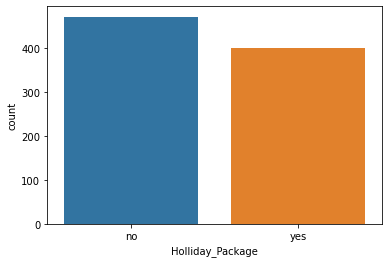

In [29]:
sns.countplot(hp1.Holliday_Package)

In [30]:
pd.DataFrame(hp1.Holliday_Package.value_counts()).T

,no,yes
Holliday_Package,471,401


In [33]:
401/872

0.4598623853211009

C:\Users\gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='foreign', ylabel='count'>

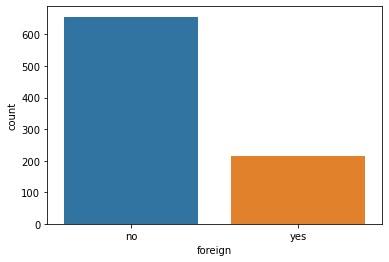

In [31]:
sns.countplot(hp1.foreign)

In [32]:
pd.DataFrame(hp1.foreign.value_counts()).T

,no,yes
foreign,656,216


C:\Users\gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='no_young_children', ylabel='count'>

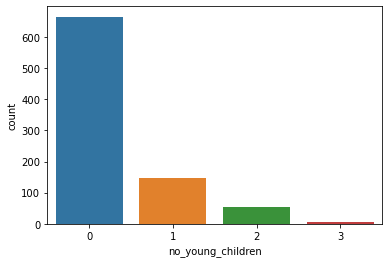

In [35]:
sns.countplot(hp1.no_young_children)

In [40]:
pd.DataFrame(hp1.no_young_children.value_counts()).T

,0,1,2,3
no_young_children,665,147,55,5


C:\Users\gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='no_older_children', ylabel='count'>

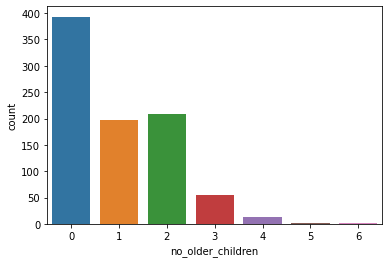

In [41]:
sns.countplot(hp1.no_older_children)

In [17]:
pd.DataFrame(hp1.no_older_children.value_counts()).T

,0,2,1,3,4,6,5
no_older_children,393,208,198,55,14,2,2


In [43]:
406/872

0.46559633027522934

In [18]:
pd.DataFrame(hp1.educ.value_counts()).T

,8,12,9,11,10,5,4,13,7,14,6,15,3,16,2,17,19,21,18,1
educ,157,124,114,100,90,67,50,43,31,25,21,15,11,10,6,3,2,1,1,1


In [28]:
pd.DataFrame(hp1.age.value_counts()).head(13).T

,44,31,34,35,33,28,40,36,38,32,41,47,39
age,35,32,32,31,30,29,29,28,28,27,26,26,25


<AxesSubplot:>

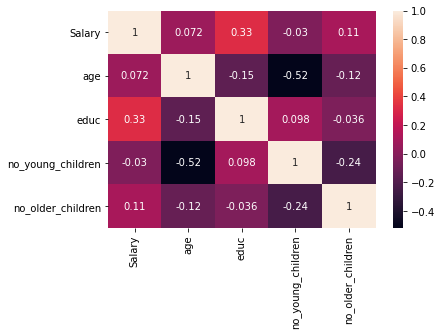

In [44]:
correlation=hp1.corr()
sns.heatmap(correlation, xticklabels=correlation.columns,
           yticklabels=correlation.columns,
           annot=True)

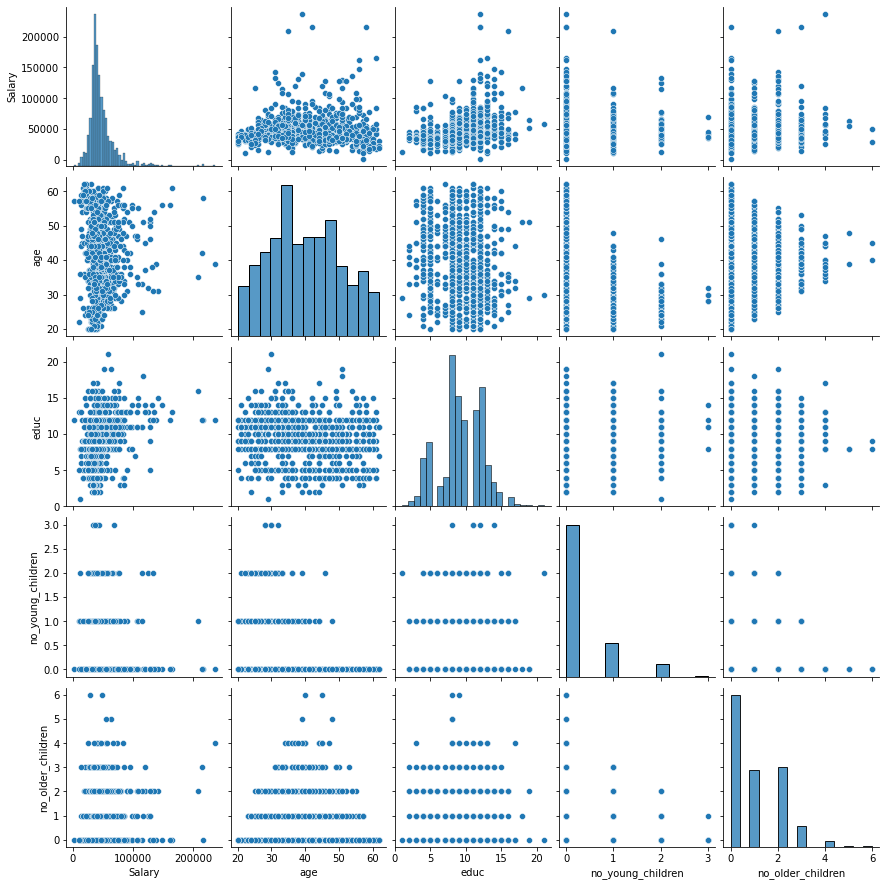

In [45]:
sns.pairplot(hp1)

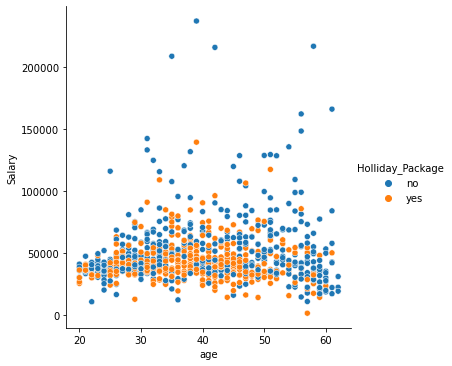

In [55]:
sns.relplot(x='age', y='Salary', hue='Holliday_Package', data=hp1)

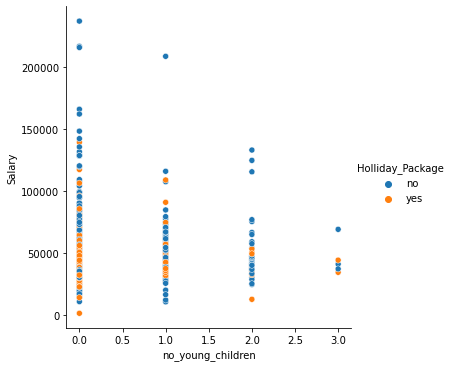

In [58]:
sns.relplot(x='no_young_children', y='Salary', hue='Holliday_Package', data=hp1)

<AxesSubplot:>

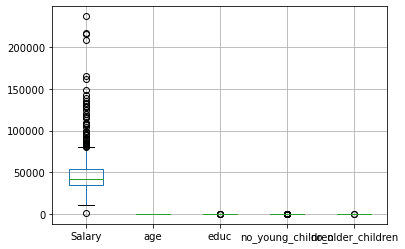

In [1470]:
hp1.boxplot()

In [64]:
from sklearn.preprocessing import OneHotEncoder
hotencoder=OneHotEncoder(drop='if_binary',
    sparse=False)

In [65]:
encoded_package = hotencoder.fit_transform(hp1.Holliday_Package.values.reshape(-1,1))
ep = pd.DataFrame(encoded_package, columns = ['Holliday_Package_HE'])
ep

,Holliday_Package_HE
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
867,0.0
868,1.0
869,0.0
870,1.0


In [66]:
encoded_foreign = hotencoder.fit_transform(hp1.foreign.values.reshape(-1,1))
ef= pd.DataFrame(encoded_foreign, columns = ['foreign_HE'])
ef

,foreign_HE
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
867,1.0
868,1.0
869,1.0
870,1.0


In [67]:
hp2 = pd.concat([hp1, ep, ef], axis=1)
hp2

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign,Holliday_Package_HE,foreign_HE
0,no,48412,30,8,1,1,no,0.0,0.0
1,yes,37207,45,8,0,1,no,1.0,0.0
2,no,58022,46,9,0,0,no,0.0,0.0
3,no,66503,31,11,2,0,no,0.0,0.0
4,no,66734,44,12,0,2,no,0.0,0.0
...,...,...,...,...,...,...,...,...,...
867,no,40030,24,4,2,1,yes,0.0,1.0
868,yes,32137,48,8,0,0,yes,1.0,1.0
869,no,25178,24,6,2,0,yes,0.0,1.0
870,yes,55958,41,10,0,1,yes,1.0,1.0


In [68]:
hp3= hp2.drop(['Holliday_Package', 'foreign'], axis=1)
hp3

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_HE,foreign_HE
0,48412,30,8,1,1,0.0,0.0
1,37207,45,8,0,1,1.0,0.0
2,58022,46,9,0,0,0.0,0.0
3,66503,31,11,2,0,0.0,0.0
4,66734,44,12,0,2,0.0,0.0
...,...,...,...,...,...,...,...
867,40030,24,4,2,1,0.0,1.0
868,32137,48,8,0,0,1.0,1.0
869,25178,24,6,2,0,0.0,1.0
870,55958,41,10,0,1,1.0,1.0


C:\Users\gupta\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\gupta\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\gupta\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and w

<AxesSubplot:xlabel='no_older_children'>

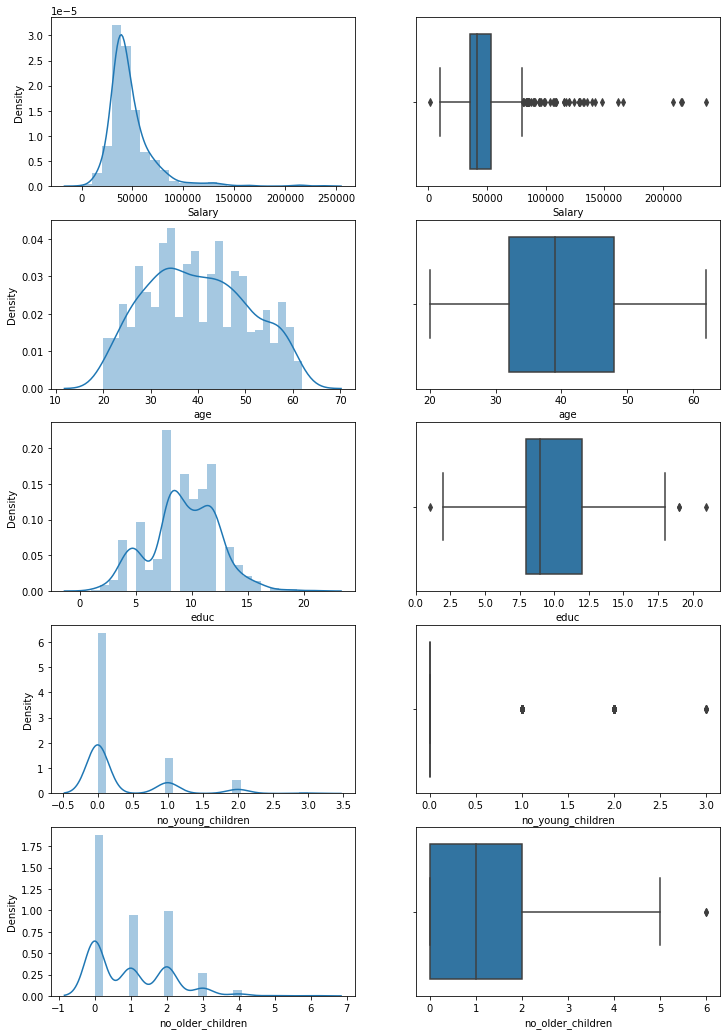

In [1662]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(12,18)

sns.distplot(hp3['Salary'], ax=axes[0][0], bins=25) 
sns.boxplot(hp3['Salary'], orient='v', ax=axes[0][1]) 

sns.distplot(hp3['age'], ax=axes[1][0], bins=25)
sns.boxplot(hp3['age'], orient='v', ax=axes[1][1])

sns.distplot(hp3['educ'], ax=axes[2][0], bins=25)
sns.boxplot(hp3['educ'], orient='v', ax=axes[2][1])

sns.distplot(hp3['no_young_children'], ax=axes[3][0], bins=25)
sns.boxplot(hp3['no_young_children'], orient='v', ax=axes[3][1])

sns.distplot(hp3['no_older_children'], ax=axes[4][0], bins=25)
sns.boxplot(hp3['no_older_children'], orient='v', ax=axes[4][1])

In [113]:
def adjust_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

la,ua=adjust_outlier(hp3['Salary'])
hp3['Salary']=np.where(hp3['Salary']>ua,ua,hp3['Salary'])
hp3['Salary']=np.where(hp3['Salary']<la,la,hp3['Salary'])

<AxesSubplot:>

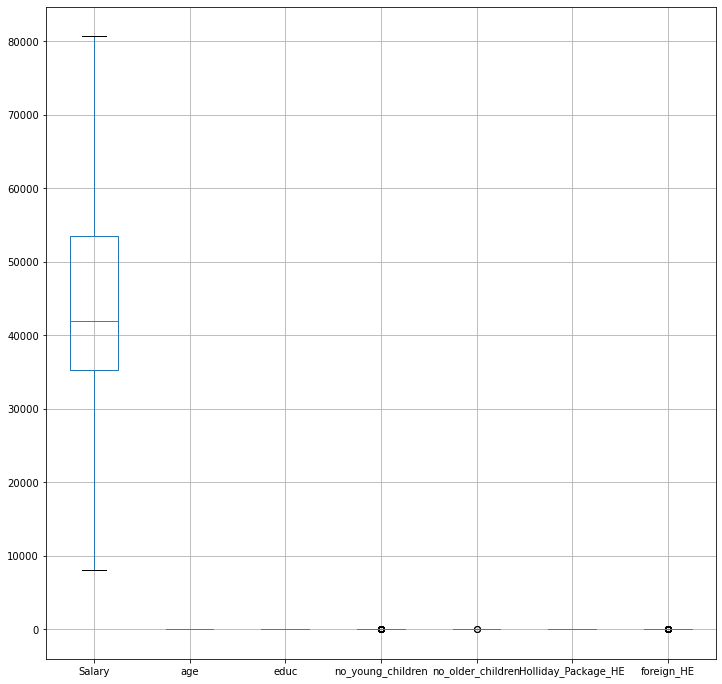

In [114]:
hp3.boxplot(figsize=(12,12))

In [115]:
hp3.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,45608.336869,15699.745151,8105.75,35324.0,41903.5,53469.5,80687.75
age,872.0,39.955275,10.551675,20.00,32.0,39.0,48.0,62.00
educ,872.0,9.302752,3.014712,2.00,8.0,9.0,12.0,18.00
no_young_children,872.0,0.311927,0.612870,0.00,0.0,0.0,0.0,3.00
no_older_children,872.0,0.982798,1.086786,0.00,0.0,1.0,2.0,6.00
Holliday_Package_HE,872.0,0.459862,0.498672,0.00,0.0,0.0,1.0,1.00
foreign_HE,872.0,0.247706,0.431928,0.00,0.0,0.0,0.0,1.00


In [116]:
X = hp3.drop(['Holliday_Package_HE'], axis=1)
y = hp3[['Holliday_Package_HE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=24)

In [117]:
X_train.shape

(610, 6)

In [118]:
X_test.shape

(262, 6)

In [119]:
X_train

,Salary,age,educ,no_young_children,no_older_children,foreign_HE
836,46488.0,50.0,7.0,0,1,1.0
750,37458.0,41.0,2.0,0,2,1.0
783,43398.0,32.0,8.0,0,2,1.0
177,55994.0,35.0,8.0,0,4,0.0
308,16001.0,47.0,9.0,0,0,0.0
...,...,...,...,...,...,...
145,52641.0,27.0,9.0,1,0,0.0
401,39099.0,59.0,8.0,0,0,0.0
343,57888.0,57.0,11.0,0,1,0.0
192,57010.0,34.0,11.0,0,2,0.0


In [120]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

C:\Users\gupta\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [121]:
logreg = LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)
logreg.fit(X_train, y_train)

C:\Users\gupta\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.6s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [122]:
logreg.score(X_train, y_train)

0.6672131147540984

In [123]:
logreg.score(X_test, y_test)

0.6526717557251909

In [124]:
model_score = model.score(X_test, y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.5534351145038168


In [125]:
y_train_predict = logreg.predict(X_train)
y_test_predict = logreg.predict(X_test)

probs_train=logreg.predict_proba(X_train)
probs_test=logreg.predict_proba(X_test)

In [129]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, y_train_predict).ravel() 
print('Number of True Positives is ',tp)
print('Number of True Negatives is ',tn)
print('Number of False Positives is ',fp)
print('Number of False Negatives is ',fn)

Number of True Positives is  159
Number of True Negatives is  248
Number of False Positives is  78
Number of False Negatives is  125


In [127]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_test_predict).ravel() 
print('Number of True Positives is ',tp)
print('Number of True Negatives is ',tn)
print('Number of False Positives is ',fp)
print('Number of False Negatives is ',fn)

Number of True Positives is  66
Number of True Negatives is  105
Number of False Positives is  40
Number of False Negatives is  51


In [128]:
# Confusion Matrix

confusion_matrix(y_train, y_train_predict)

array([[248,  78],
       [125, 159]], dtype=int64)

In [81]:
# Confusion Matrix

confusion_matrix(y_test, y_test_predict)

array([[105,  40],
       [ 51,  66]], dtype=int64)

In [85]:
# Classification Report

print(classification_report(y_train, y_train_predict))
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

         0.0       0.67      0.76      0.71       326
         1.0       0.67      0.57      0.62       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610

              precision    recall  f1-score   support

         0.0       0.67      0.72      0.70       145
         1.0       0.62      0.56      0.59       117

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262



# Build LDA Model

In [87]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

C:\Users\gupta\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [88]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [93]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

Confusion Matrix:


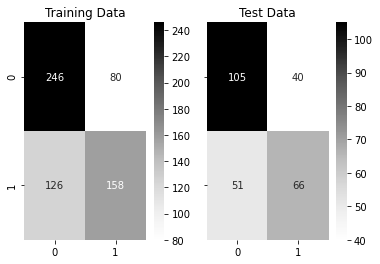

In [89]:
print('Confusion Matrix:')
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [94]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, pred_class_train).ravel() 
print('Number of True Positives is ',tp)
print('Number of True Negatives is ',tn)
print('Number of False Positives is ',fp)
print('Number of False Negatives is ',fn)

Number of True Positives is  158
Number of True Negatives is  246
Number of False Positives is  80
Number of False Negatives is  126


In [95]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred_class_test).ravel() 
print('Number of True Positives is ',tp)
print('Number of True Negatives is ',tn)
print('Number of False Positives is ',fp)
print('Number of False Negatives is ',fn)

Number of True Positives is  66
Number of True Negatives is  105
Number of False Positives is  40
Number of False Negatives is  51


In [1678]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.66      0.75      0.70       326
         1.0       0.66      0.56      0.61       284

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.67      0.72      0.70       145
         1.0       0.62      0.56      0.59       117

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262
 



In [1679]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [1680]:
pred_prob_train[:,1]

array([0.64033109, 0.7563101 , 0.84352918, 0.47015116, 0.52855438,
       0.50081059, 0.30699729, 0.60445905, 0.5714389 , 0.39769255,
       0.60336325, 0.82627566, 0.46386188, 0.28117937, 0.23993156,
       0.29788299, 0.19275974, 0.63227662, 0.46351882, 0.52942372,
       0.33830362, 0.65015001, 0.2810688 , 0.44941102, 0.37383538,
       0.78695083, 0.17988056, 0.65730897, 0.33171149, 0.23035912,
       0.44882616, 0.40034904, 0.7181038 , 0.41269383, 0.43299578,
       0.4675673 , 0.51701521, 0.75576687, 0.39665971, 0.70946227,
       0.33448806, 0.67298956, 0.42781514, 0.73021599, 0.82480318,
       0.32839468, 0.56574646, 0.47948616, 0.16491146, 0.33831529,
       0.50638153, 0.31840856, 0.39678997, 0.7563931 , 0.53998893,
       0.77635694, 0.4667952 , 0.53256009, 0.36466823, 0.75519589,
       0.60710855, 0.33964904, 0.09379222, 0.75460054, 0.7334895 ,
       0.26080597, 0.38974236, 0.82674943, 0.88354662, 0.57574111,
       0.28066702, 0.68865531, 0.40578719, 0.57305834, 0.88197

AUC for the Training Data: 0.730
AUC for the Test Data: 0.713


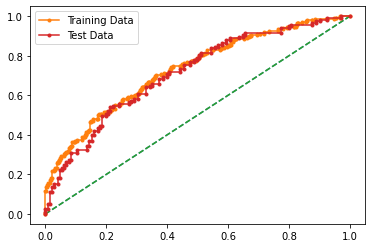

In [1681]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()